In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from scipy.stats import sem
from sklearn.metrics import confusion_matrix

In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [6]:
# Load dataset
dataset = pd.read_csv(r'C:\Users\adars\KDD\project1\featureSelectedDataset.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,11.947431,0.801756,51.614,35.807860,73.15,48.66,0.111816,48.634625,90.574,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,4.605392,3.168264,20.500,61.654161,34.23,61.43,0.021999,49.604197,16.890,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,20.065391,0.229381,18.500,48.662900,93.29,72.46,0.811334,53.270334,35.038,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,8.691025,0.378911,45.799,0.000000,18.74,35.63,0.709471,52.189871,88.199,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,1.237884,0.336018,43.539,0.247525,24.62,20.76,0.126465,50.360061,62.043,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [37]:
# Split the dataset into features and obs

X = dataset.iloc[:,0:10]
y = dataset["AboveAverageLifeExpectancyByYear"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
kclf = KNeighborsClassifier()
kclf.fit(X_train, y_train)

In [10]:
kclf = KNeighborsClassifier()


KNeighborsClassifier()

In [5]:
y_pred = kclf.predict(X_test)

In [6]:
# User defined function for accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [7]:
cm = confusion_matrix(y_pred, y_test)
print('Accuracy of KNNClassifier : ', accuracy(cm))

Accuracy of MLPClassifier :  0.9646660212971926


In [8]:
print('Accuracy training : {:.3f}'.format(kclf.score(X_train, y_train)))
print('Accuracy testing : {:.3f}'.format(kclf.score(X_test, y_test)))

Accuracy training : 0.977
Accuracy testing : 0.965


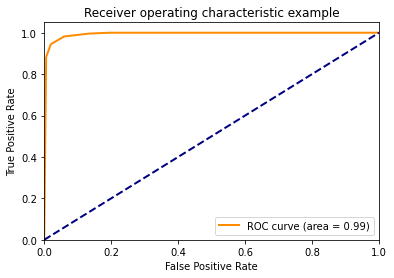

In [9]:
# Generate ROC plot
fpr2, tpr2, threshold = roc_curve(y_test, kclf.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('KNNClassfierROC.jpg', dpi=300)
plt.show()

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(kclf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [40]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.954 (0.010)


In [41]:
rcv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rscores = cross_val_score(kclf, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)

In [42]:
print('Accuracy: %.3f (%.3f)' % (mean(rscores), std(rscores)))

Accuracy: 0.956 (0.010)


In [43]:
# evaluate a model with number of repeats

def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = KNeighborsClassifier()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [44]:
# test configurations

repeats = range(1,16)
results = list()

In [47]:
for r in repeats:
    scores = evaluate_model(X_train, y_train, r)
# summary
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))

    results.append(scores)

>1 mean=0.9545 se=0.003
>2 mean=0.9552 se=0.003
>3 mean=0.9564 se=0.002
>4 mean=0.9567 se=0.002
>5 mean=0.9563 se=0.002
>6 mean=0.9561 se=0.001
>7 mean=0.9558 se=0.001
>8 mean=0.9556 se=0.001
>9 mean=0.9557 se=0.001
>10 mean=0.9561 se=0.001
>11 mean=0.9561 se=0.001
>12 mean=0.9561 se=0.001
>13 mean=0.9560 se=0.001
>14 mean=0.9558 se=0.001
>15 mean=0.9560 se=0.001


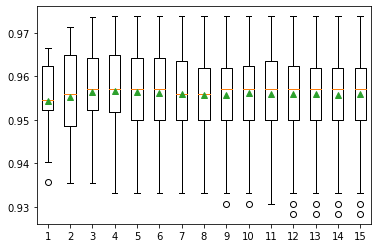

In [49]:
#  summary of distribution of scores for each number of repeats

plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()